# Modelo anidado

Primero importamos la base de datos:

In [ ]:
datos<-read.csv('/home/lorena/Escritorio/Estadistica aplicada y R/Literatura/Modelo anidado/Ejemplo para modelo jerárquico.csv')
datos

Ahora, definimos los factores y los declaramos como categóricos:

In [ ]:
proveedor<-as.factor(datos$proveedor)
lotes<-as.factor(datos$lotes)

Definimos la variable respuesta:

In [5]:
y <- datos$pureza

In [ ]:
library(Matrix)
library(GAD)

Definimos qué factor es fijo y qué factor aleatorio de acuerdo al problema:

In [6]:
proveedor <- as.fixed (proveedor)
lotes<- as.random (lotes)

Definimos el modelo lineal:

In [7]:
m1<-lm(y~proveedor+proveedor%in%lotes)

## ANOVA

In [9]:
gad(m1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
proveedor,2,15.05556,7.527778,0.9690107,0.41578309
proveedor:lotes,9,69.91667,7.768519,2.9438596,0.01667416
Residual,24,63.33333,2.638889,NA,NA


De acuerdo al valor de _p_, los lotes son diferentes con los proveedores.

## Calculando las estimaciones de los componentes de varianza

Para calcular el componente de varianza del factor lote se usa la fórmula: $\frac{CM B(A) -CME}{n}$

In [12]:
CMB_A = gad(m1)['proveedor:lotes','Mean Sq']

In [13]:
CME = gad(m1)['Residual', 'Mean Sq']

Ya que el componente de varianza para el error es igual a CME, definimos a las varianzas como:

In [15]:
vars <- round(c((CMB_A-CME)/3,CME),2)
vars

[1] 1.71 2.64

## Calculando los porcentajes de variación aleatoria 

In [21]:
porcentaje <- round(100*vars/sum(vars),2)

In [22]:
porcentaje

[1] 39.31 60.69

## Creando gráfica de pastel

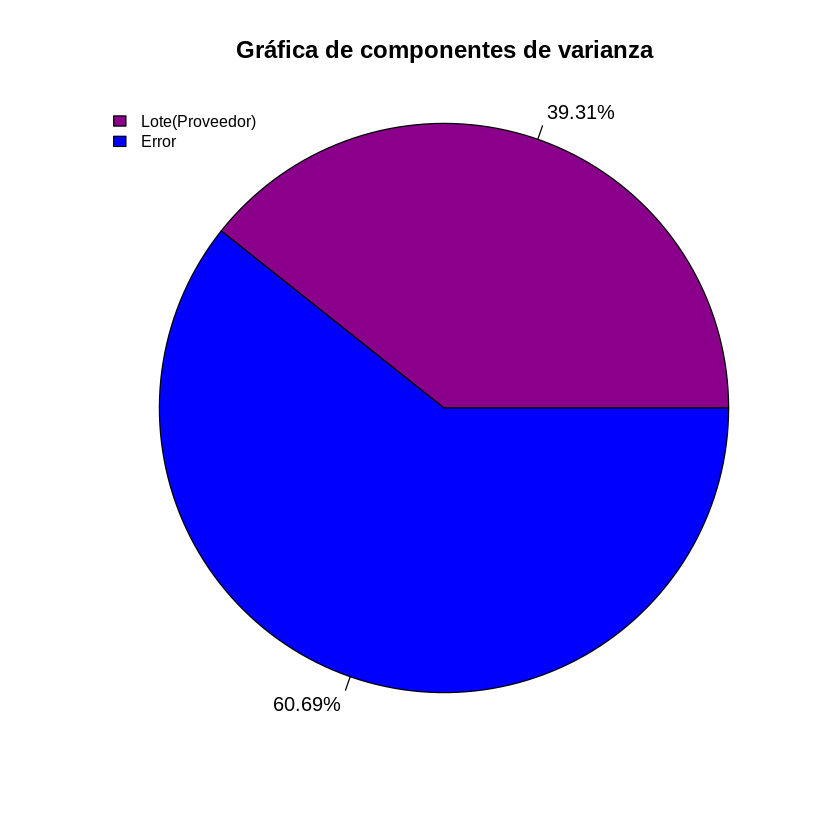

In [23]:
etiqueta<-paste(porcentaje,"%",sep ="")
colores<-c("darkmagenta","blue1")
pie(porcentaje,labels=etiqueta,col=colores, radius=1, main="Gráfica de componentes de varianza")
legend("topleft",c("Lote(Proveedor)","Error"),cex=0.8,fill=colores, bty="n")

Ya que el error es el que tiene la mayor variación, lo mejor es aumentar el número de repeticiones en la prueba.

## Verificando los supuestos del modelo 

### Normalidad de los residuos

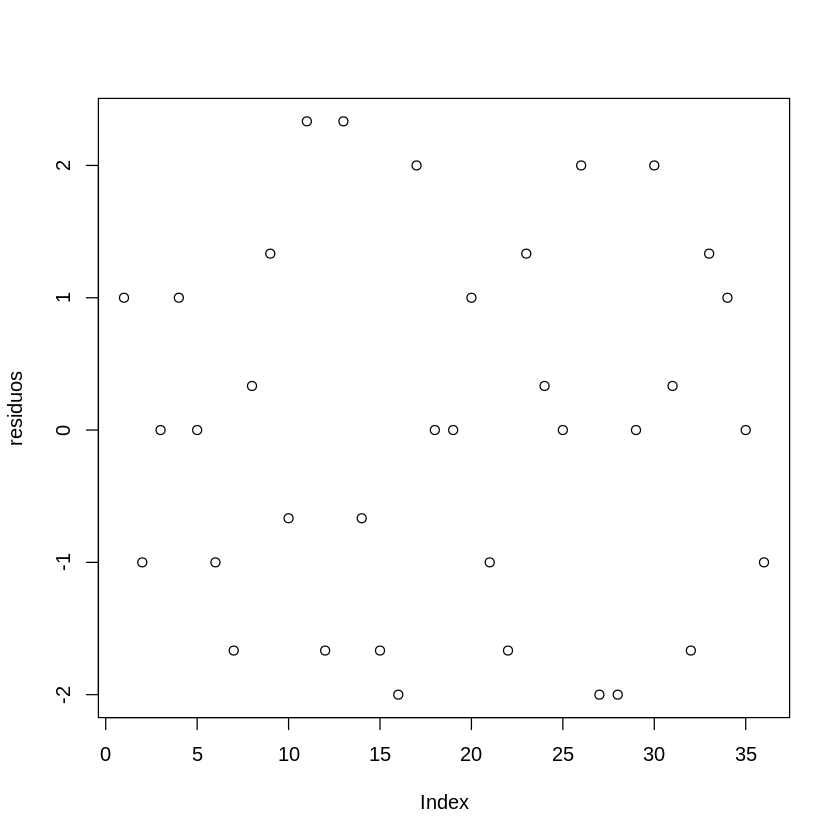

In [24]:
residuos<-c(m1$res)

#### Gráfica de normalidad

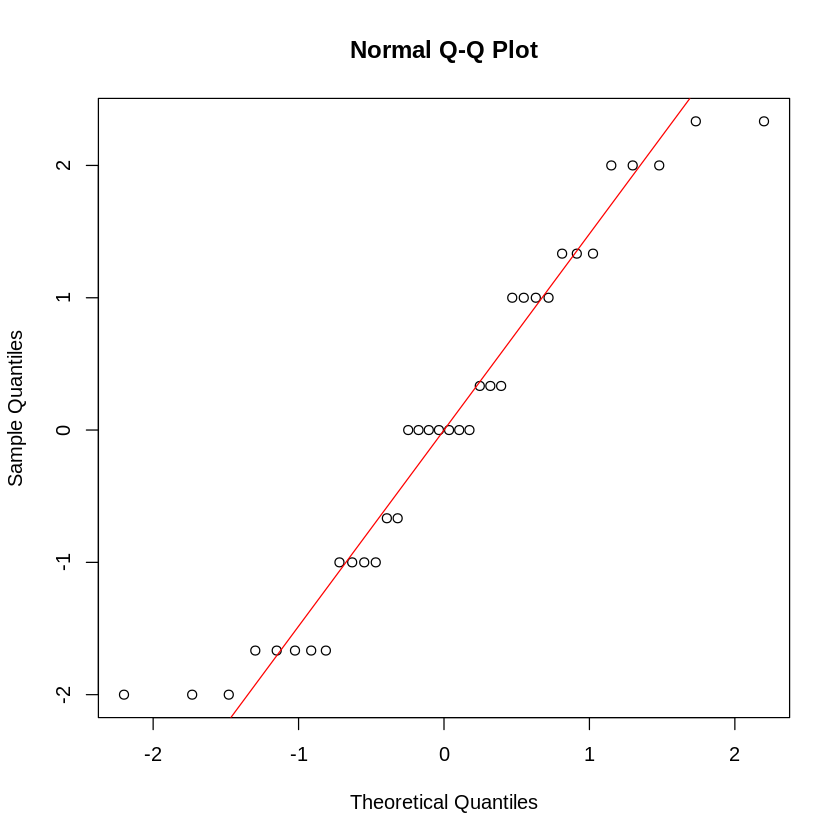

In [25]:
qqnorm(residuos)
qqline(residuos, col="red")

#### Histograma 

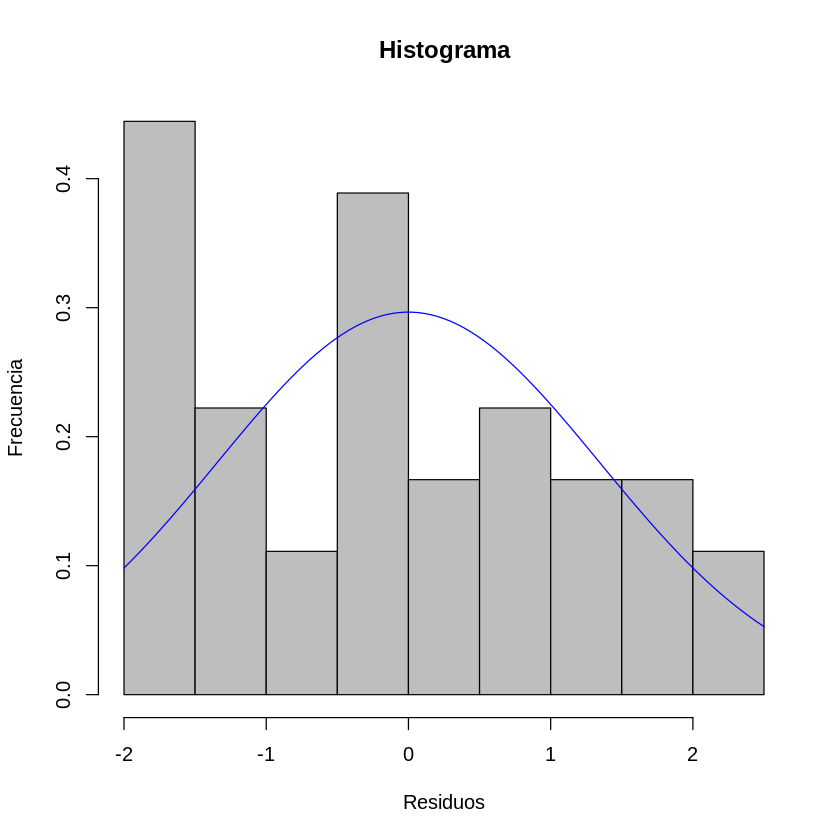

In [39]:
hist(residuos, prob = T, main = "Histograma", xlab = "Residuos", ylab = "Frecuencia", col = "gray")
x = residuos
m <- mean(x)
s <- sd(x)
curve(dnorm(x, mean = m, sd = s),col="blue", add=TRUE)

#### Caja de bigotes

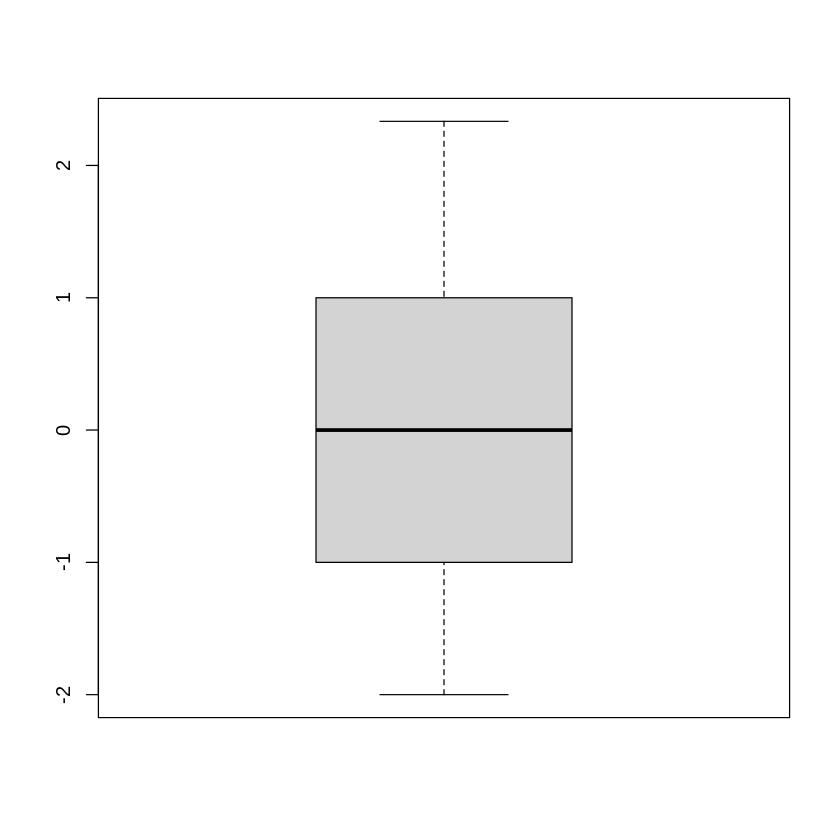

In [27]:
boxplot(residuos)

#### Prueba de normalidad

In [28]:
shapiro.test(residuos)


	Shapiro-Wilk normality test

data:  residuos
W = 0.93896, p-value = 0.04717


en este caso, $p < 0.05$, por lo que se rechaza $H_0$, lo que quiere decir que los errores no tiene una distribución normal.

### Independencia de los residuos 

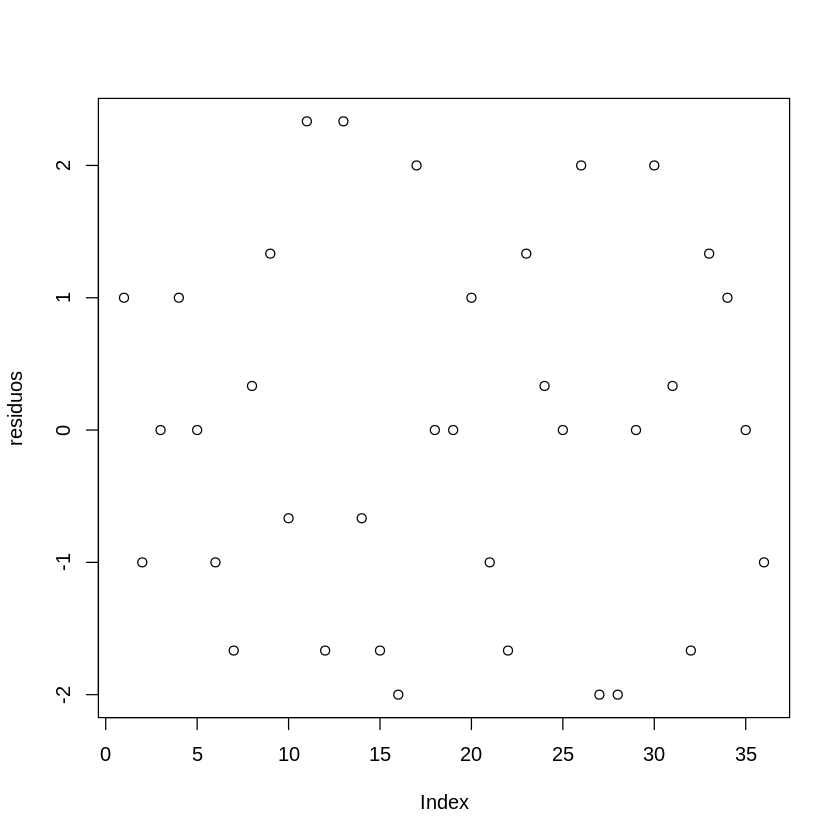

In [36]:
plot(residuos)

In [ ]:
library(tseries)

#### Prueba de rachas

In [38]:
runs.test(as.factor(m1$residual>0))


	Runs Test

data:  as.factor(m1$residual > 0)
Standard Normal = 0.41868, p-value = 0.6755
alternative hypothesis: two.sided


dado el valor de _p_, no se rechaza $H_0$, por lo que los residuos sí son independientes.

**Conclusión**: ya que no se cumple uno de los supuestos del modelo, lo mejor es aumentar el número de repeticiones para que el error tenga la distribución normal. Si no es posible hacer eso, nos podemos quedar con lo que ya tenemos, porque $p \sim 0.05$.